In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset into the Python Jupyter Environment

In [2]:
df = pd.read_csv("adult.data", header=None, sep=", ")

<ipython-input-2-bcd8edaa76df>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.data", header=None, sep=", ")


In [3]:
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

# Data Pre-Processing/Cleaning

In [4]:
df.isna().sum().sum()

0

In [5]:
pd.Series(np.count_nonzero(df.to_numpy()=='?', axis=0), index=df.columns)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [6]:
df = df[df["workclass"] != '?']

In [7]:
df = df[df["occupation"] != '?']

In [8]:
df = df[df["native-country"] != '?']

In [9]:
pd.Series(np.count_nonzero(df.to_numpy()=='?', axis=0), index=df.columns)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Splitting the Data Collection into two parts

First Part - Data Containing records where the class feature or the salary is less than or equal to 50k

In [11]:
df_class_below_50k = df[df["class"] == "<=50K"]
print("Count(Data Containing records where the class feature or the salary is less than or equal to 50k) = " + str(len(df_class_below_50k.index)))

Count(Data Containing records where the class feature or the salary is less than or equal to 50k) = 22654


Second Part - Data Containing records where the class feature or the salary is greater than 50k

In [12]:
df_class_above_50k = df[df["class"] == ">50K"]
print("Count(Data Containing records where the class feature or the salary is greater than 50k) = " + str(len(df_class_above_50k.index)))

Count(Data Containing records where the class feature or the salary is greater than 50k) = 7508


Print the total number of rows post data pre-pocessing and cleaning

In [13]:
len(df.index)

30162

# Univariate Analysis for columns containing Numerical Data

In [14]:
def analyze_numerical_data(df_numerical_column):
    list_containing_data_above_50k_for_the_specific_numerical_column = list(df_class_above_50k[df_numerical_column])
    list_containing_data_below_50k_for_the_specific_numerical_column = list(df_class_below_50k[df_numerical_column])
    
    print("Univariate Analysis for the numerical column - ", df_numerical_column)
    print()
    print("Mean of the numerical column - ", df_numerical_column)
    print("Above 50K = " + str(np.mean(list_containing_data_above_50k_for_the_specific_numerical_column)))
    print("Below 50K = " + str(np.mean(list_containing_data_below_50k_for_the_specific_numerical_column)))
    print()
    print("Median of the numerical column - ", df_numerical_column)
    print("Above 50K = " + str(np.median(list_containing_data_above_50k_for_the_specific_numerical_column)))
    print("Below 50K = " + str(np.median(list_containing_data_below_50k_for_the_specific_numerical_column)))
    print()
    print("Standard Deviation of the numerical column - ", df_numerical_column)
    print("Above 50K = " + str(np.std(list_containing_data_above_50k_for_the_specific_numerical_column)))
    print("Below 50K = " + str(np.std(list_containing_data_below_50k_for_the_specific_numerical_column)))

    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    axes[0, 0].boxplot(list_containing_data_above_50k_for_the_specific_numerical_column)
    axes[0, 0].set_title(">50K")
    axes[0, 0].set_xlabel(df_numerical_column)
    
    axes[0, 1].boxplot(list_containing_data_below_50k_for_the_specific_numerical_column)
    axes[0, 1].set_title("<=50K")
    axes[0, 1].set_xlabel(df_numerical_column)
    
    axes[1, 0].hist(list_containing_data_above_50k_for_the_specific_numerical_column)
    axes[1, 0].set_title(">50K")
    axes[1, 0].set_xlabel(df_numerical_column)
    
    axes[1, 1].hist(list_containing_data_below_50k_for_the_specific_numerical_column)
    axes[1, 1].set_title("<=50K")
    axes[1, 1].set_xlabel(df_numerical_column)
    
    plt.show()

Univariate Analysis for the numerical column -  age

Mean of the numerical column -  age
Above 50K = 43.95911028236548
Below 50K = 36.60806038668668

Median of the numerical column -  age
Above 50K = 43.0
Below 50K = 34.0

Standard Deviation of the numerical column -  age
Above 50K = 10.268948900217353
Below 50K = 13.464334073886043


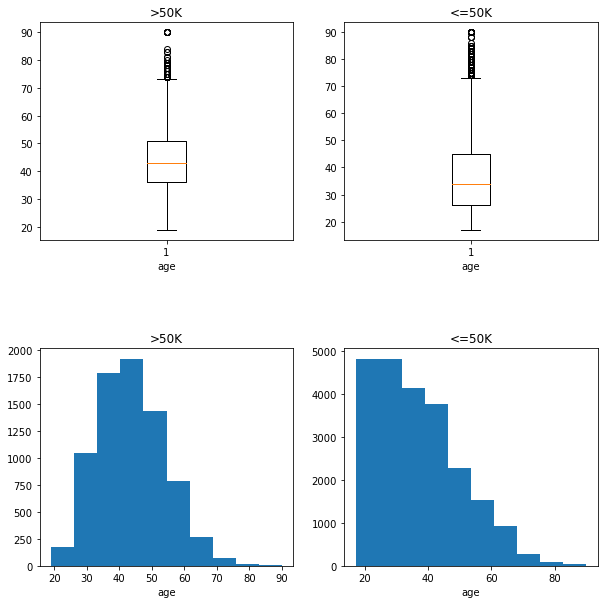

In [15]:
analyze_numerical_data("age")

Univariate Analysis for the numerical column -  fnlwgt

Mean of the numerical column -  fnlwgt
Above 50K = 188149.96217368142
Below 50K = 190338.64672905448

Median of the numerical column -  fnlwgt
Above 50K = 176185.0
Below 50K = 179508.5

Standard Deviation of the numerical column -  fnlwgt
Above 50K = 102814.88940721683
Below 50K = 106568.99082609416


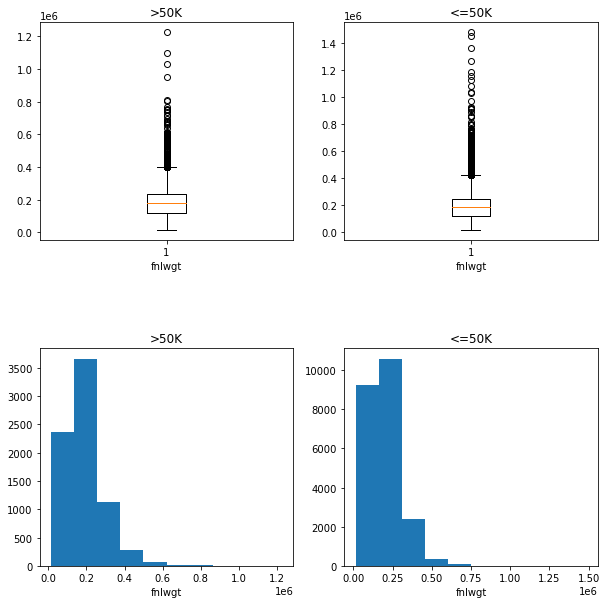

In [16]:
analyze_numerical_data("fnlwgt")

Univariate Analysis for the numerical column -  education-num

Mean of the numerical column -  education-num
Above 50K = 11.606419818859882
Below 50K = 9.629116270857244

Median of the numerical column -  education-num
Above 50K = 12.0
Below 50K = 9.0

Standard Deviation of the numerical column -  education-num
Above 50K = 2.3682652194812
Below 50K = 2.413542861800171


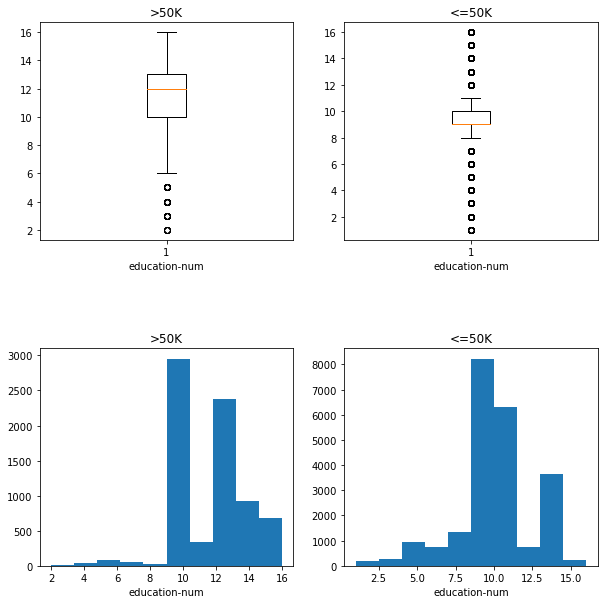

In [17]:
analyze_numerical_data("education-num")

Univariate Analysis for the numerical column -  capital-gain

Mean of the numerical column -  capital-gain
Above 50K = 3937.6798082045816
Below 50K = 148.8938377328507

Median of the numerical column -  capital-gain
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation of the numerical column -  capital-gain
Above 50K = 14385.101938325177
Below 50K = 936.3716120599768


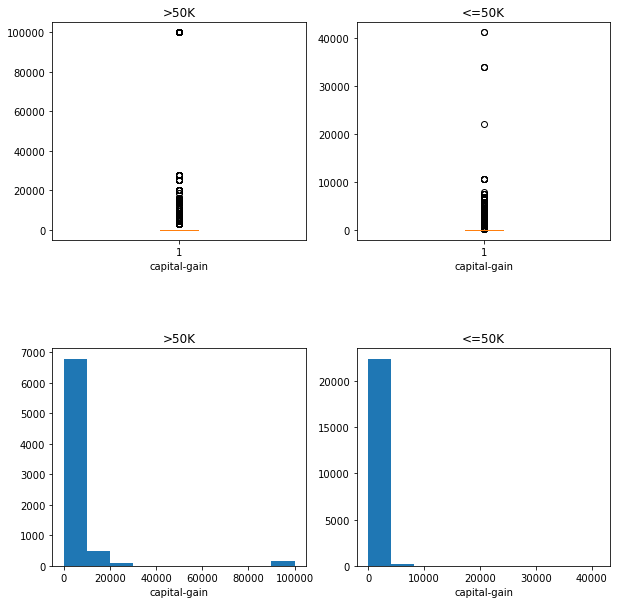

In [18]:
analyze_numerical_data("capital-gain")

Univariate Analysis for the numerical column -  capital-loss

Mean of the numerical column -  capital-loss
Above 50K = 193.75066595631327
Below 50K = 53.44800035313852

Median of the numerical column -  capital-loss
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation of the numerical column -  capital-loss
Above 50K = 592.7861087307447
Below 50K = 310.2634148738493


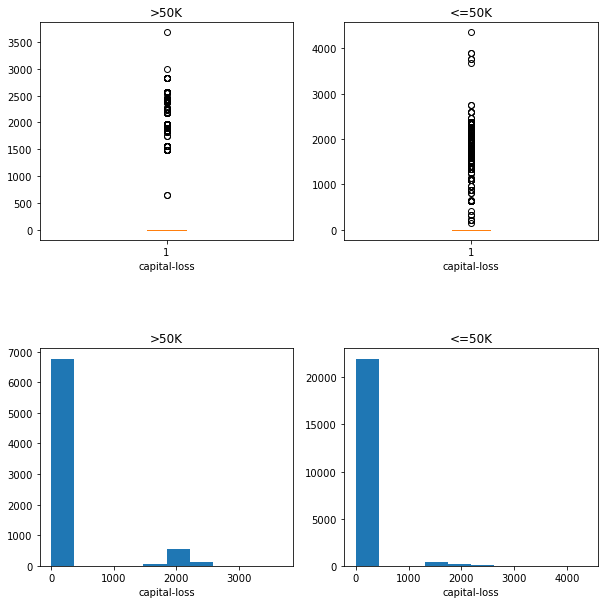

In [19]:
analyze_numerical_data("capital-loss")

Univariate Analysis for the numerical column -  hours-per-week

Mean of the numerical column -  hours-per-week
Above 50K = 45.70657964837507
Below 50K = 39.34859186015715

Median of the numerical column -  hours-per-week
Above 50K = 40.0
Below 50K = 40.0

Standard Deviation of the numerical column -  hours-per-week
Above 50K = 10.736271573483807
Below 50K = 11.950510368604052


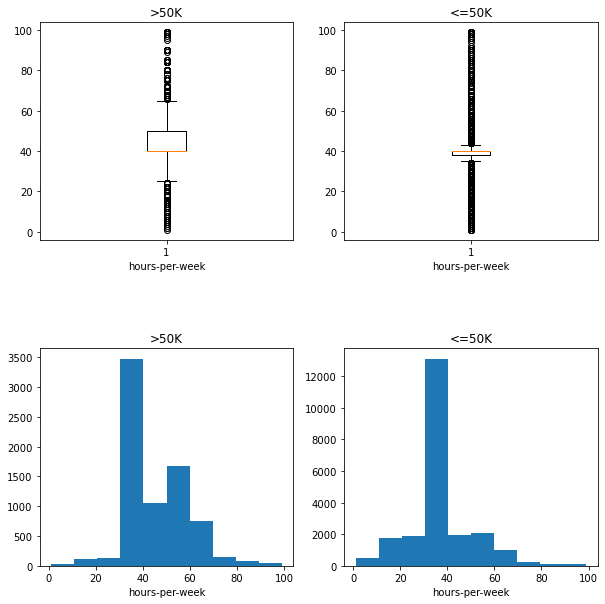

In [20]:
analyze_numerical_data("hours-per-week")

# Univariate Analysis for columns containing Categorical Data

In [21]:
def analyze_categorical_data(df_categorical_column):
    list_containing_data_above_50k_for_the_specific_categorical_column = Counter(df_class_above_50k[df_categorical_column])
    list_containing_data_below_50k_for_the_specific_categorical_column = Counter(df_class_below_50k[df_categorical_column])

    print("Univariate Analysis for the Categorical column - ", df_categorical_column)
    print()
    plt.close()
    fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (20 , 30))
    axes[0].pie(list_containing_data_above_50k_for_the_specific_categorical_column.values(), labels = list_containing_data_above_50k_for_the_specific_categorical_column.keys(), autopct = '%1.0f%%')
    axes[0].set_title(">50K")
    axes[0].legend(loc = "best")
    
    axes[1].pie(list_containing_data_below_50k_for_the_specific_categorical_column.values(), labels = list_containing_data_below_50k_for_the_specific_categorical_column.keys(), autopct = '%1.0f%%')
    axes[1].set_title("<=50K")
    axes[1].legend(loc = "best")
    plt.show()

Univariate Analysis for the Categorical column -  workclass



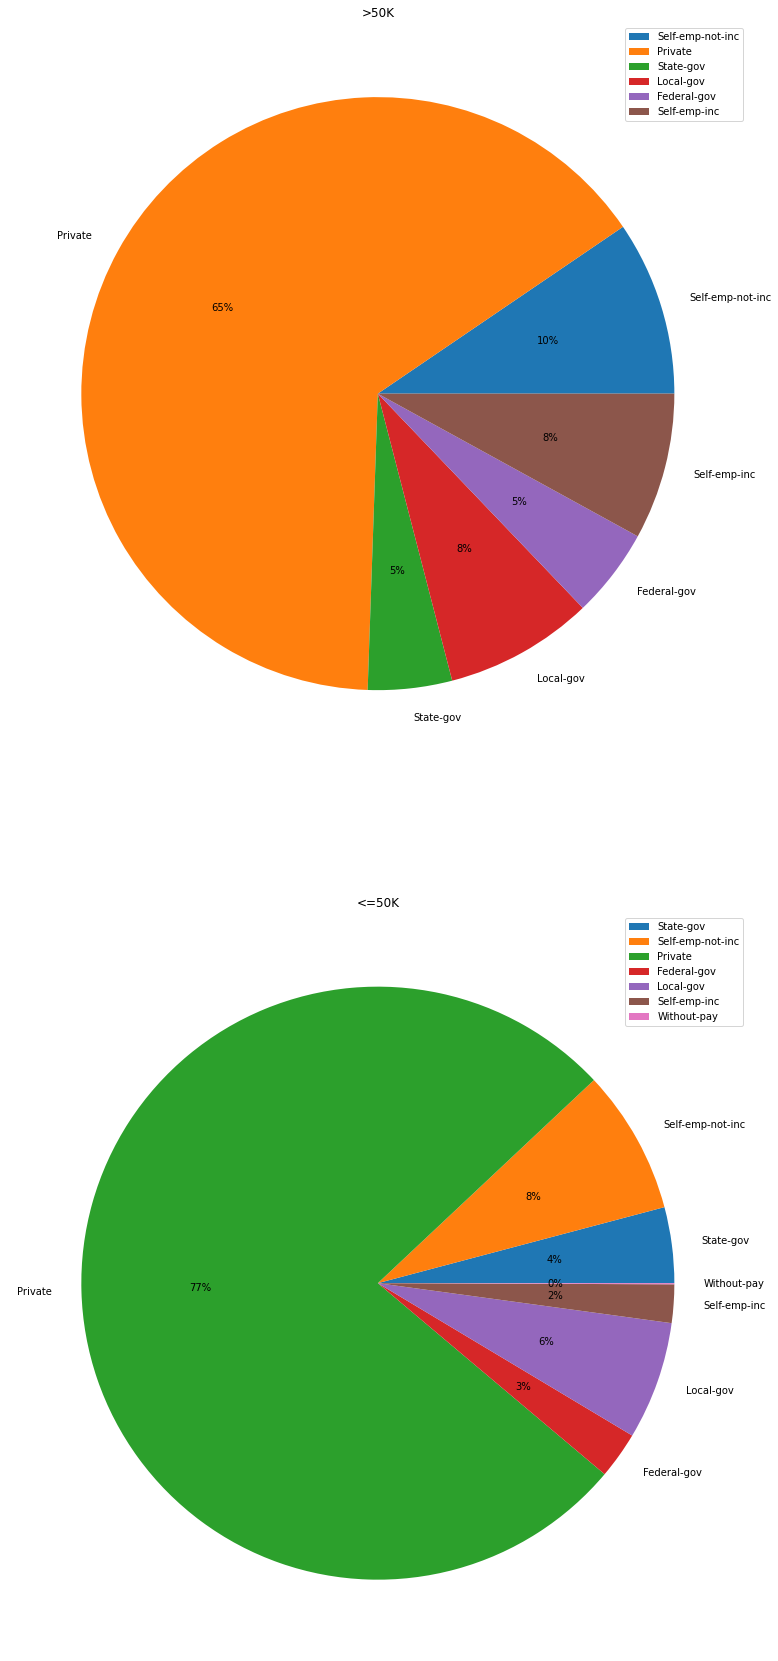

In [22]:
analyze_categorical_data("workclass")

Univariate Analysis for the Categorical column -  education



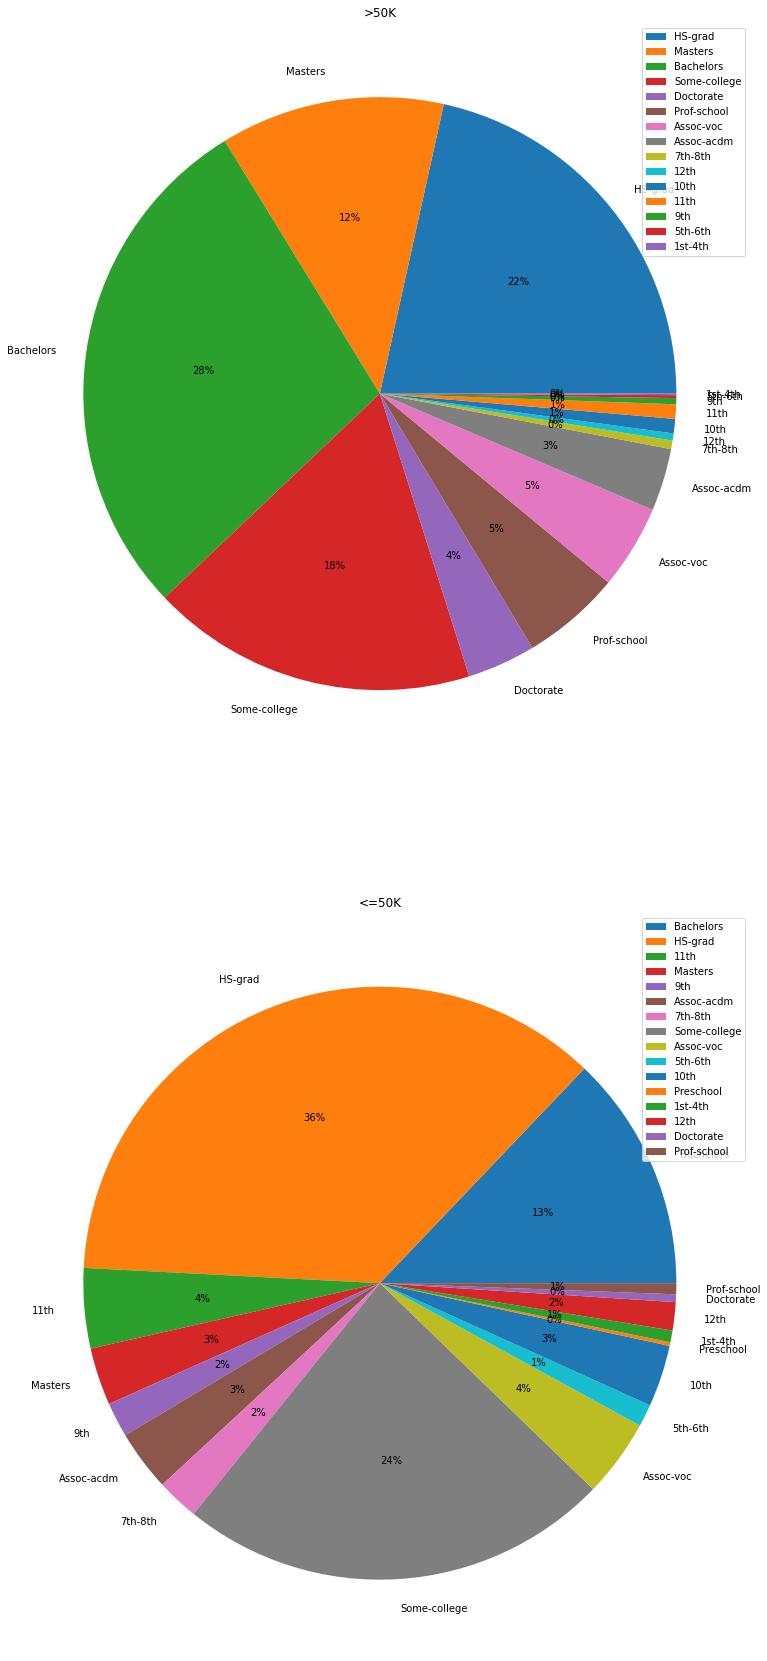

In [23]:
analyze_categorical_data("education")

Univariate Analysis for the Categorical column -  marital-status



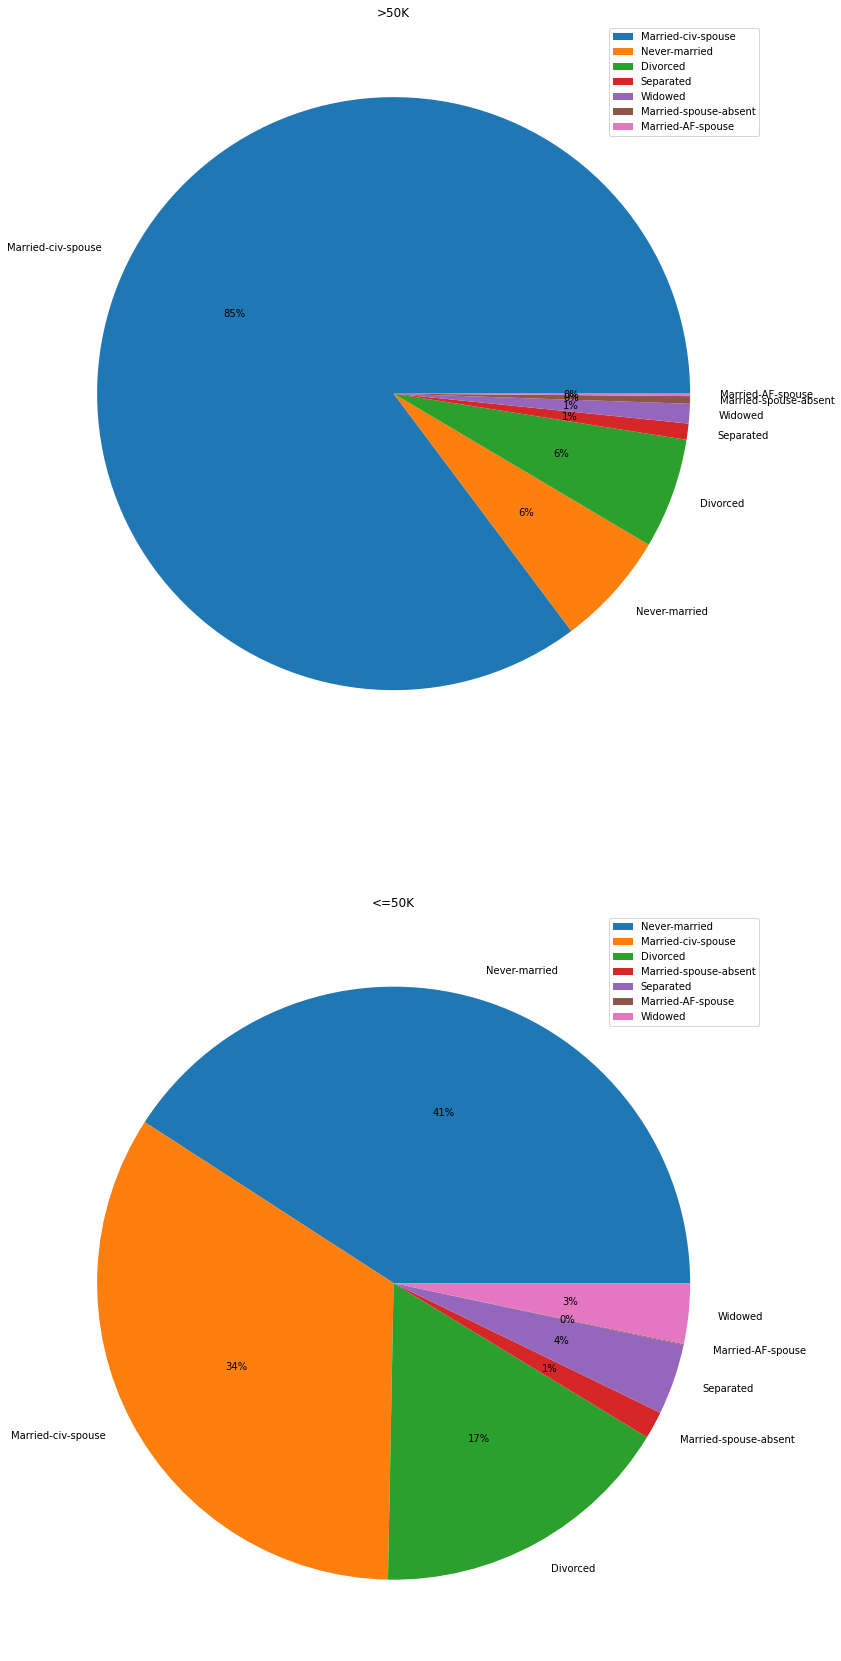

In [24]:
analyze_categorical_data("marital-status")

Univariate Analysis for the Categorical column -  occupation



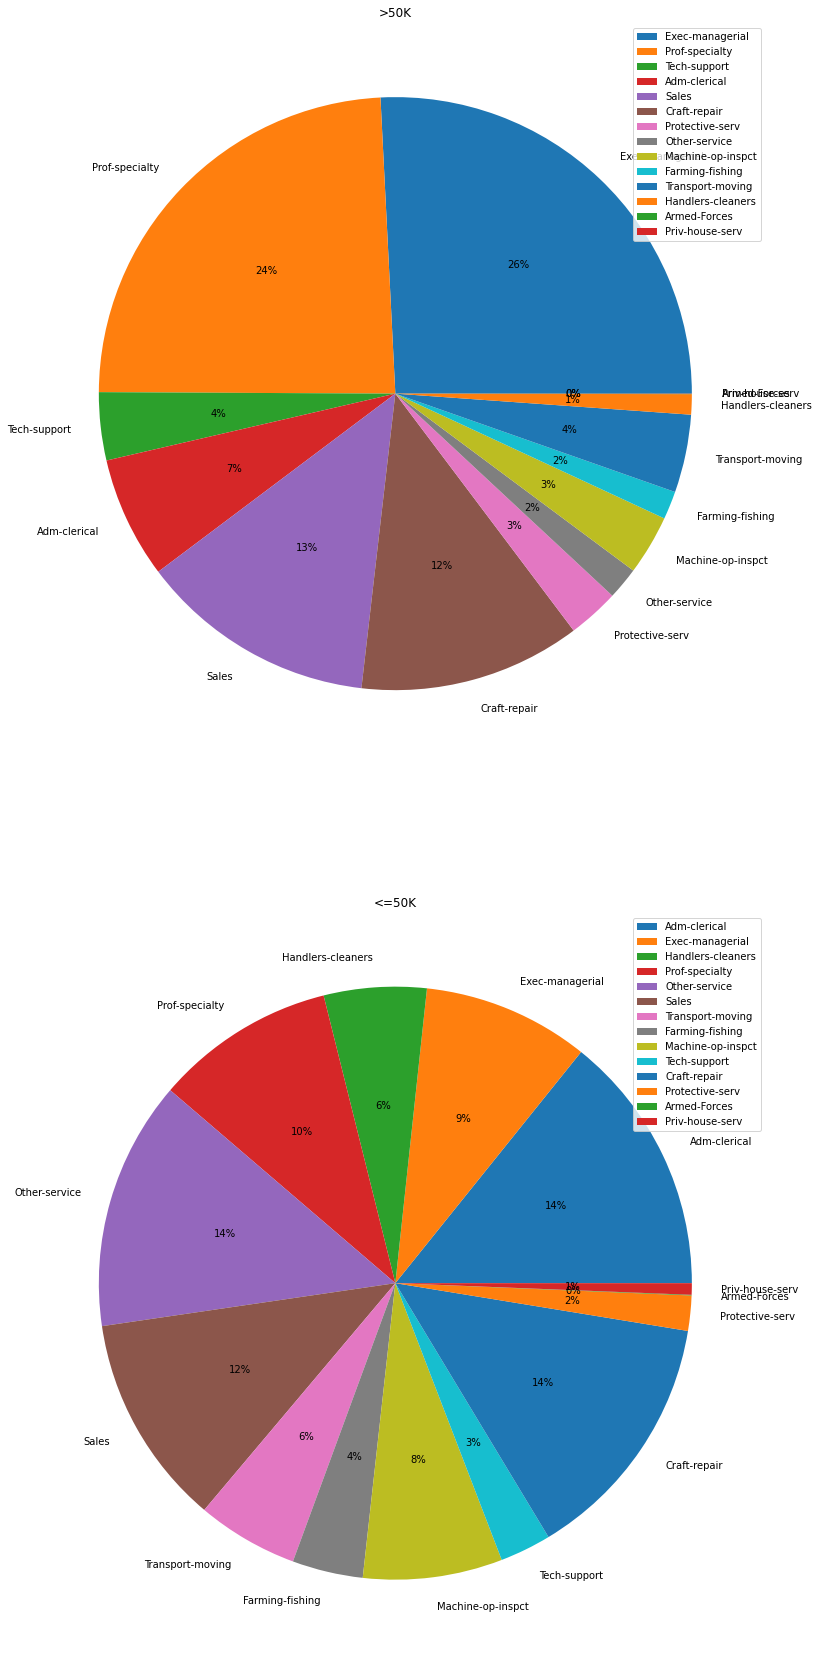

In [25]:
analyze_categorical_data("occupation")

Univariate Analysis for the Categorical column -  relationship



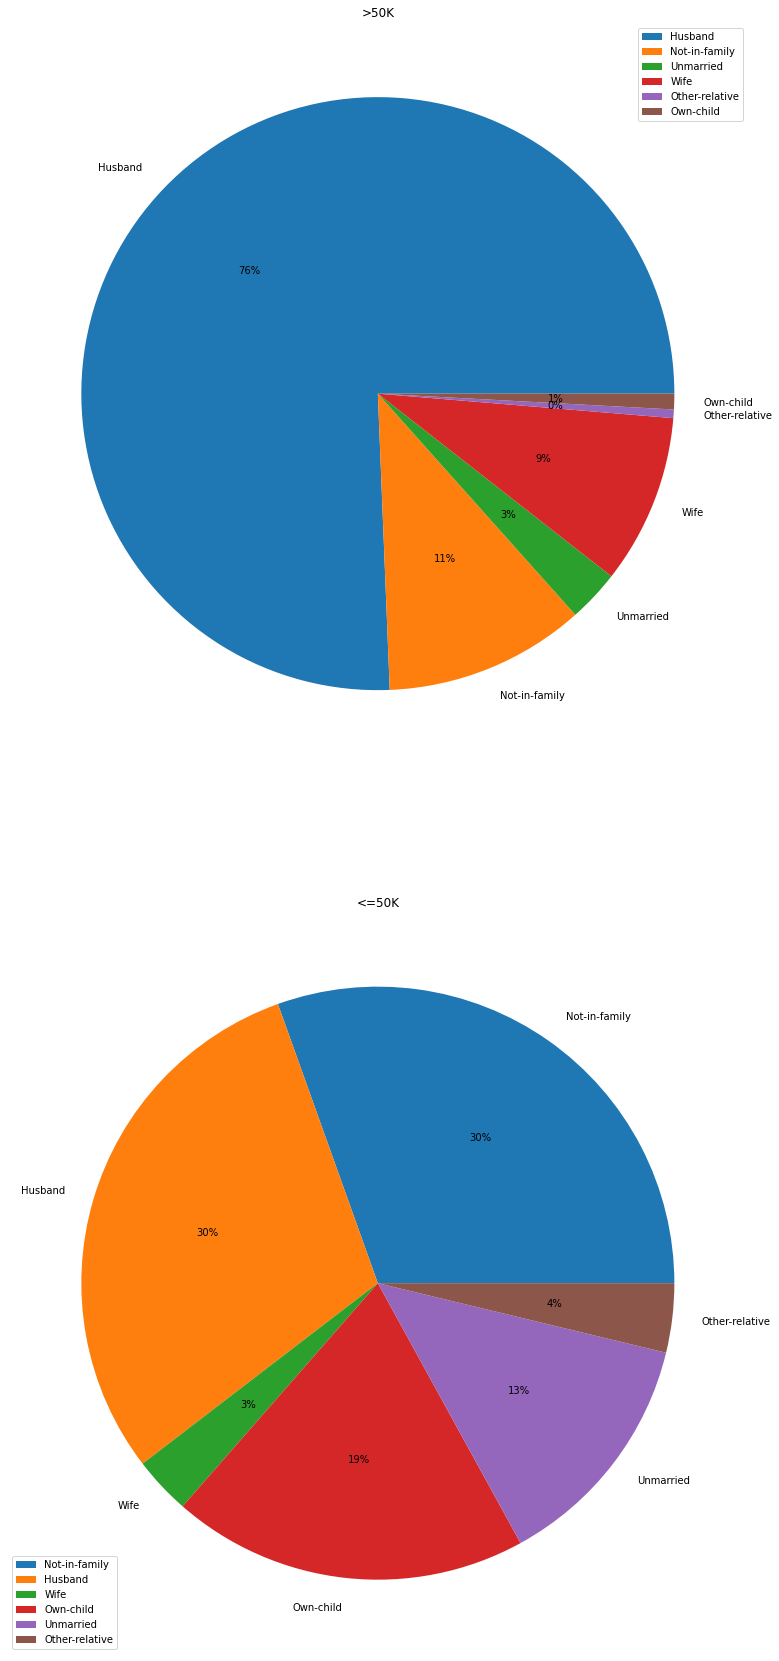

In [26]:
analyze_categorical_data("relationship")

Univariate Analysis for the Categorical column -  race



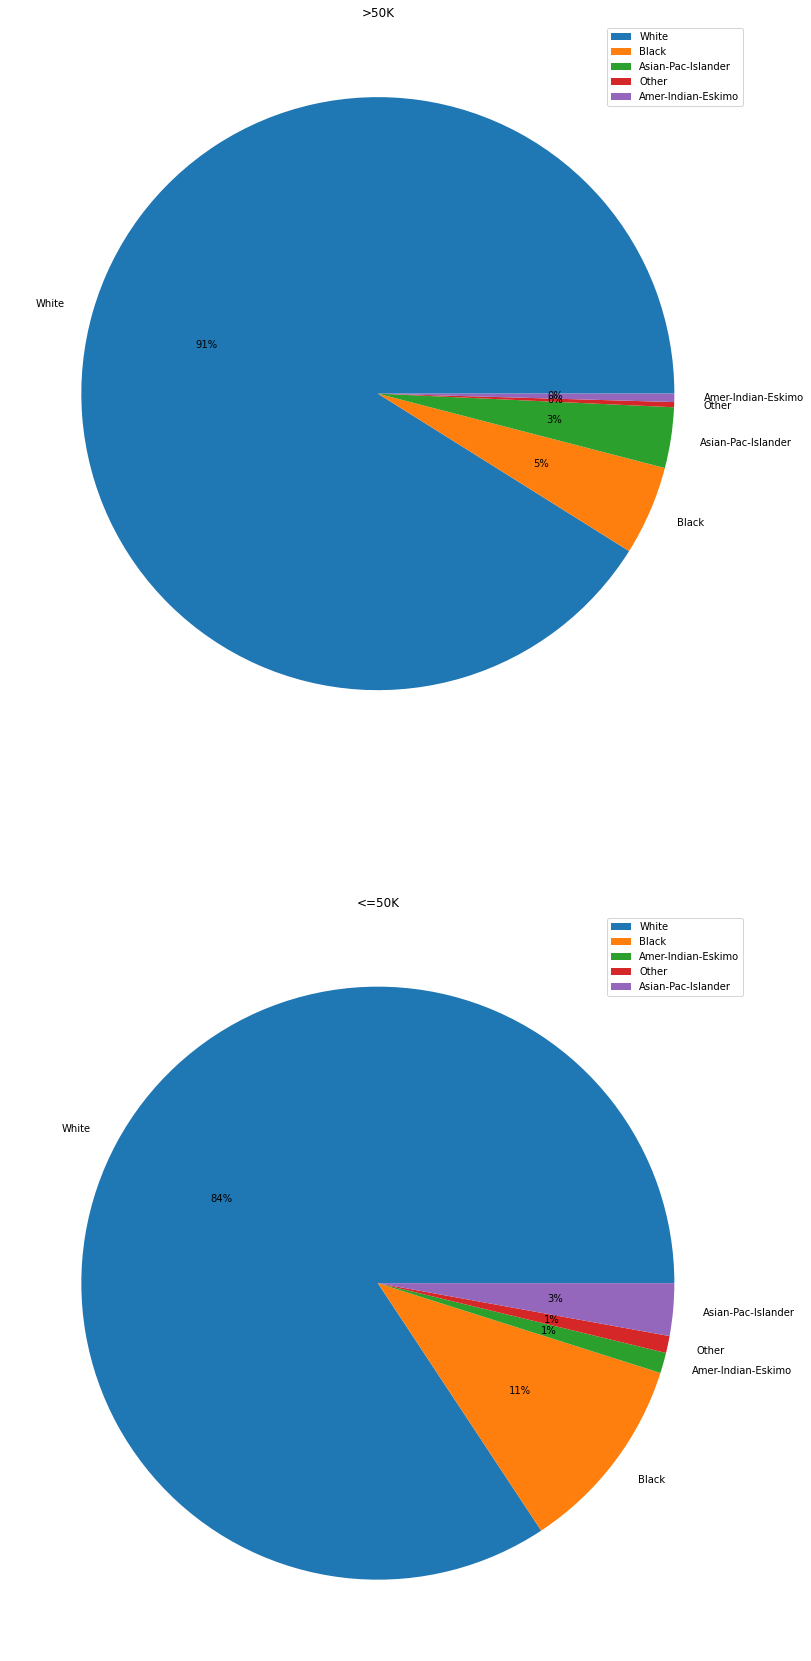

In [27]:
analyze_categorical_data("race")

Univariate Analysis for the Categorical column -  sex



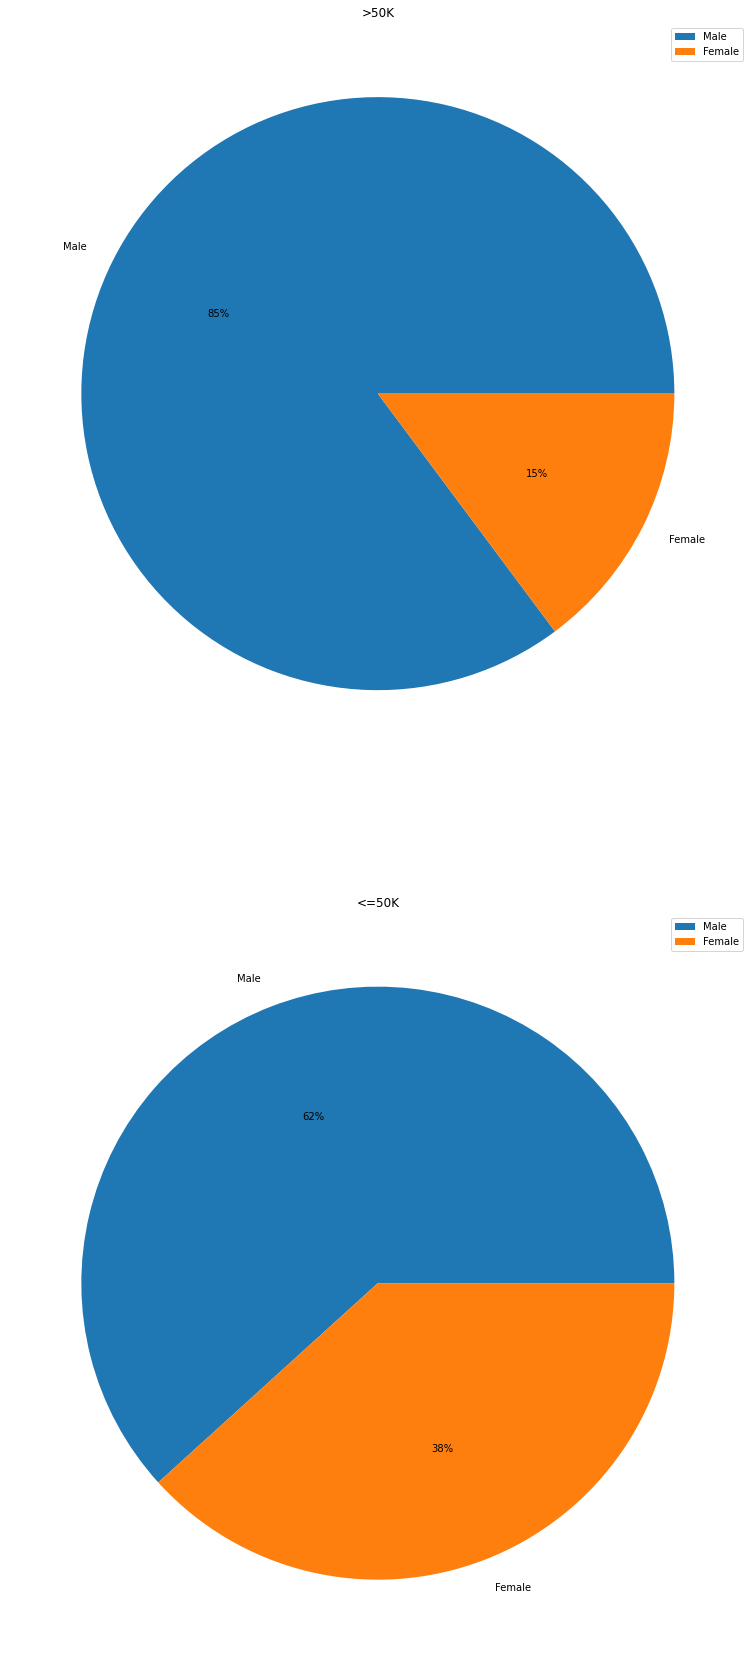

In [28]:
analyze_categorical_data("sex")

Univariate Analysis for the Categorical column -  native-country



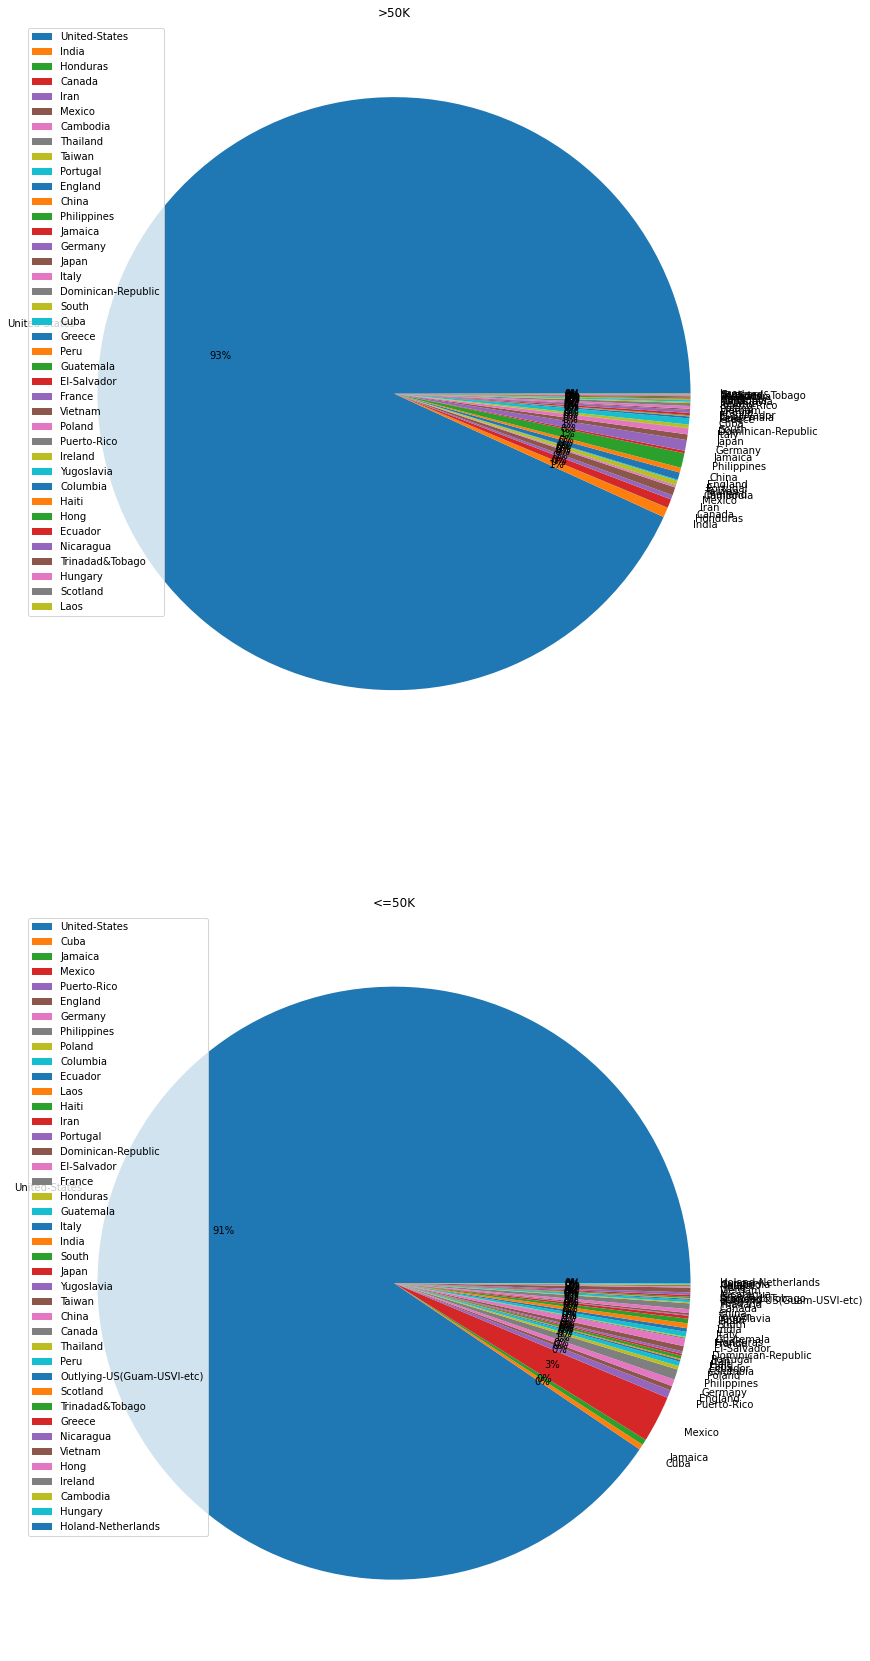

In [29]:
analyze_categorical_data("native-country")

In [30]:
df1 = pd.read_csv("adult.data", header=None, sep=", ")

<ipython-input-30-2a8e1eadae97>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("adult.data", header=None, sep=", ")


In [31]:
df1.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

In [32]:
df2 = df1[df1["class"] == '<=50K']

In [33]:
df3 = df1[df1["class"] == '>50K']

In [34]:
df2.shape

(24720, 15)

In [35]:
df3.shape

(7841, 15)